# Data Discreption

This dataset contains student performance data from two Portuguese secondary schools. It includes attributes such as student grades, demographic, social, and school-related features. The data were collected using school reports and questionnaires. The goal of this dataset is to predict student performance in secondary education.



## Attributes

1. **school**: student's school (binary: 'GP' for Gabriel Pereira or 'MS' for Mousinho da Silveira)
2. **sex**: student's sex (binary: 'F' for female or 'M' for male)
3. **age**: student's age (numeric: from 15 to 22)
4. **address**: student's home address type (binary: 'U' for urban or 'R' for rural)
5. **famsize**: family size (binary: 'LE3' for less than or equal to 3 or 'GT3' for greater than 3)
6. **Pstatus**: parent's cohabitation status (binary: 'T' for living together or 'A' for apart)
7. **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
8. **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education, or 4 – higher education)
9. **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup**: extra educational support (binary: yes or no)
17. **famsup**: family educational support (binary: yes or no)
18. **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities**: extra-curricular activities (binary: yes or no)
20. **nursery**: attended nursery school (binary: yes or no)
21. **higher**: wants to take higher education (binary: yes or no)
22. **internet**: Internet access at home (binary: yes or no)
23. **romantic**: with a romantic relationship (binary: yes or no)
24. **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health**: current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences**: number of school absences (numeric: from 0 to 93)

### Target Variable

31. **G1**: first period grade (numeric: from 0 to 20)
32. **G2**: second period grade (numeric: from 0 to 20)
33. **G3**: final grade (numeric: from 0 to 20, output target)

### Citation

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


# Understanding The Data

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## import Data

In [ ]:
df = pd.read_csv("Data/student-por.csv",sep=";")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

We Decided that our target will be the average grade for 3 years

In [ ]:
df["avg_Grade"] = (df["G1"]+df["G2"]) /2

In [ ]:
df.drop(columns=["G1","G2"],inplace=True)

In [ ]:
df.head()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64']).columns
numerical_columns

In [ ]:

fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns[i]} Distribution",
              fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontfamily': 'oxygen'})
    sns.histplot(df[numerical_columns[i]], bins='rice', kde=True)  # Use square root estimator

plt.show()


In [ ]:
# Select numerical columns for pairplot
# numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# len(numerical_columns)
# # Plot pairplot
#sns.pairplot(df, vars=['avg_Grade'] + list(df.columns[:-4]))
cols = list(df.columns)
cols.remove('G3')
# Create pairplots for each attribute against 'avg_grade'

sns.pairplot(df,x_vars=cols,y_vars=["G3"])
        

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
numerical_columns_list = df.select_dtypes(include=['int64', 'float64']).columns

fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns_list)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns_list[i]} Boxplot")
    sns.boxplot(df[numerical_columns_list[i]],orient="v")

plt.show()

## Outliers Removal

In [ ]:
df["failures"].value_counts()

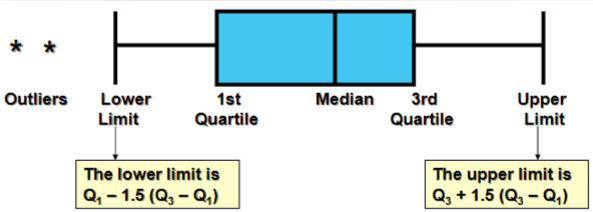

In [ ]:
for col in numerical_columns_list:
    if col == "failures":
        continue
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
numerical_columns_list = df.select_dtypes(include=['int64', 'float64']).columns

fig = plt.figure(figsize=(20, 20))

for i in range(len(numerical_columns_list)):
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.7, wspace=0.4, hspace=0.4)
    plt.subplot(4, 4, i + 1)
    plt.title(f"{numerical_columns_list[i]} Boxplot")
    sns.boxplot(df[numerical_columns_list[i]],orient="v")

plt.show()

There exists outliers in absences, failures, farmel, Dalc, travelyime, studytime, avg_grade and age

In [ ]:
fig = plt.figure(figsize=(15, 15))

sns.heatmap(numerical_columns.corr(),annot=True, linewidths=0.05)

- There exists multicolinearity between Medu and Fedu so we will drop one of them
- There exists multicolinearity between Malc and Dalc so we will drop one of them

In [ ]:
df.drop(columns=["Walc","Fedu"],inplace =True)

In [ ]:
categorical_columns = [c for c  in df.columns if c not in numerical_columns]
categorical_columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_df = ordinal_encoder.fit_transform(df[categorical_columns])
fig = plt.figure(figsize=(20, 20))

ordinal_encoded_df = pd.DataFrame(ordinal_encoded_df,columns=categorical_columns)
ordinal_encoded_df["G3"] = df["G3"]
sns.heatmap(ordinal_encoded_df.corr(),annot=True, linewidths=0.05)


# Here We begin with hypothesis testing   

## First define our hypothesis and get a general function for hypothesis test

1-Null Hypothesis(H0): the two categories in binary columns  in our dataset have the same performance regarding average grades
2-Alternative Hypothesis(H1): the  two categories in binary columns in our dataset have different perfromance regarding Final average

Here we choose binary categorical columns


In [ ]:
binary_categorical_columns=[c for c in categorical_columns if len(df[c].unique()) == 2] #here we choose colmns that have only 2 values(categories)

In [ ]:
from scipy import stats


def hypothesis_test(column):  # we give this function a binary categorical columns and we do hypothesis test on its two categories to see whether their average final grade will differ
    cat1 = df[column].unique()[0]
    cat2 = df[column].unique()[1]
    
    df1 = df[df[column] == cat1]
    df2 = df[df[column] == cat2]
    
    X0 = np.mean(df1["G3"])
    X1 = np.mean(df2["G3"])
    X_bar = X0 - X1
    
    Sigma1 = np.std(df1["G3"])
    Sigma2 = np.std(df2["G3"])
    
    Sig_1 = (Sigma1**2)/len(df1)
    Sig_2 = (Sigma2**2)/len(df2)
    SE = np.sqrt(Sig_1+Sig_2)
    
    Z_score = X_bar/SE  # we use Z_score because n>30
    p_value = 2 * stats.norm.cdf(-abs(Z_score))
    alpha = 0.05

    if p_value < alpha:
        print(f"Reject the null hypothesis. The means are significantly different (p-value = {p_value:.04f})")
        return True
    else:
        print(f"Fail to reject the null hypothesis. The means are not significantly different (p-value = {p_value:.04f})")
        return False


In [ ]:
Rejected = []
non_rejected = []

for column in binary_categorical_columns:
    print("Hypothesis test for column : ", column)
    if (hypothesis_test(column)):
        Rejected.append(column)
    else:
        non_rejected.append(column)
    print("-----------------------------------------------------")


In [ ]:
print("Categories that differ from one another (affect our data): ")
print(Rejected)
print("Categories that do not differ alot from one another( not significant enough to know whether it affects or not):")
print(non_rejected)


# Model Building

## First we will define our features and our target

In [106]:
l = []

for i in df:
    if (i != "G3"):
        l.append(i)

X = df[l]
y = df['G3']


,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,avg_Grade
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,3,4,5.5
1,GP,F,17,U,GT3,T,1,at_home,other,course,...,yes,yes,no,5,3,3,1,3,2,10.0
2,GP,F,15,U,LE3,T,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,6,12.5
3,GP,F,15,U,GT3,T,4,health,services,home,...,yes,yes,yes,3,2,2,1,5,0,14.0
4,GP,F,16,U,GT3,T,3,other,other,home,...,yes,no,no,4,3,2,1,5,0,12.0


In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py)